In [297]:
import nltk

In [298]:
# загружаем текст
f = open('capital.txt', encoding="utf8")
raw = f.read()
words = nltk.word_tokenize(raw)

In [299]:
# оставляем только те слова, которые полностью состоят из букв, чтобы избавиться от знаков пунктуации и мусора
words = [w for w in words if w.isalpha()]

# преобразуем слова в нижний регистр
words = [w.lower() for w in words]

# по хорошему тут еще нужно сделать стемминг, чтобы более точно оценить лексическое разнообразие

# создаём объект текста из предварительно обработанных слов
text = nltk.Text(words)

In [300]:
word_count = len(words)
# преобразуем слова из списка в множество, тем самым оставляем только уникальные
words = set(words)
unique_word_count = len(words)

print('Количество слов в тексте:', word_count)
print('Количество уникальных слов в тексте:', unique_word_count)
print('Лексическое разнообразие:', unique_word_count / word_count)

Количество слов в тексте: 84376
Количество уникальных слов в тексте: 6595
Лексическое разнообразие: 0.07816203659808477


In [301]:
stopwords = set(nltk.corpus.stopwords.words('english'))
# удаляем стопслова, как разность между множествами
words = words - stopwords
print(len(words))

6472


In [302]:
# оставляем только нормальные слова, которые есть в словаре, как пересечение множеств
# имеет смысл делать, только если был выполнен стемминг, потому что иначе удалится слишком много слов
# all_english_words = set(nltk.corpus.words.words())
# words = words & all_english_words
# print(len(words))

In [303]:
# Узнаём частоту встречаемости каждого слова в тексте
words_freq = nltk.FreqDist(text)
# Узнаём часть речи каждого слова
parts_of_speech = dict(nltk.pos_tag(words))

# создаём массив кортежей вида [(слово, частота, часть речи)]
words_info = [(w, words_freq[w], parts_of_speech[w]) for w in words]
print(words_info[:5])

[('cows', 1, 'NNS'), ('lessing', 1, 'VBG'), ('whether', 39, 'IN'), ('haben', 2, 'NN'), ('metallic', 49, 'NN')]


In [304]:
# выполняем сортировку по второму элементу кортежа - частоты, reverse означает сортировку по убыванию
words_info.sort(key=lambda w: w[1], reverse=True)

# выбираем первые элементы из кортежа
most_freq_words = [wi[0] for wi in words_info[:5]]
most_rare_words = [wi[0] for wi in words_info[-5:]]
median_idx = int(len(words_freq) / 2)
median_words = [wi[0] for wi in words_info[median_idx -3: median_idx + 2]] 

print('Самые частые слова:', most_freq_words)
print('Самые редкие слова:', most_rare_words)
print('Слова около медианы:', median_words)

Самые частые слова: ['money', 'value', 'gold', 'commodities', 'circulation']
Самые редкие слова: ['ignominous', 'despendethe', 'horses', 'omnia', 'patient']
Слова около медианы: ['resting', 'mythological', 'heretofore', 'witness', 'rechtsverhältnisse']


In [305]:
def filter_words_by_part_of_speech1(words_info, parts_of_speech):
    return [(w, f, ps) for w, f, ps in words_info if ps in parts_of_speech]

def filter_words_by_part_of_speech2(word_info, parts_of_speech):
    result = []
    for w, f, ps in word_info:
        if ps in parts_of_speech:
            result.append((w, f, ps))
    return result

# теги я нашёл тут https://stackoverflow.com/questions/15388831/what-are-all-possible-pos-tags-of-nltk
# три разных способа сделать одно и тоже
nouns = filter_words_by_part_of_speech1(words_info, ['NN', 'NNS', 'NNP'])
adjectives = [(w, f, ps) for w, f, ps in words_info if ps == 'JJ' or ps == 'JJR' or ps == 'JJS']
verbs = filter_words_by_part_of_speech2(words_info, ['VBD', 'VBG', 'VBN', 'VBP', 'VBZ'])

print('Самые частые существительные', nouns[:5])
print('Самые частые прилагательные', adjectives[:5])
print('Самые частые глаголы', verbs[:5])

Самые частые существительные [('money', 809, 'NN'), ('value', 701, 'NN'), ('commodities', 614, 'NNS'), ('circulation', 554, 'NN'), ('commodity', 426, 'NN')]
Самые частые прилагательные [('first', 153, 'JJ'), ('universal', 148, 'JJ'), ('social', 139, 'JJ'), ('certain', 138, 'JJ'), ('different', 133, 'JJ')]
Самые частые глаголы [('gold', 644, 'VBP'), ('exchange', 521, 'VBP'), ('form', 334, 'VBP'), ('means', 153, 'VBZ'), ('measure', 124, 'VBP')]


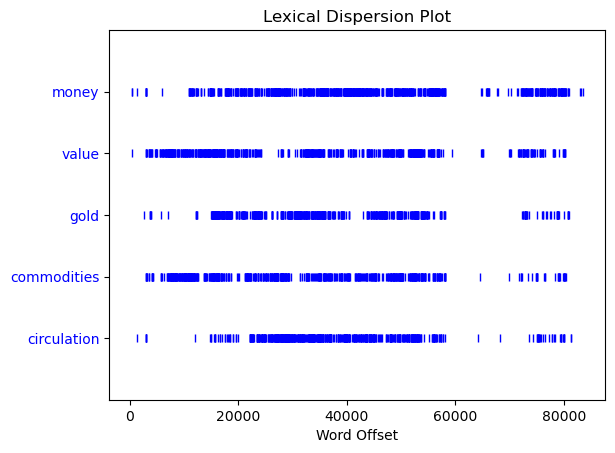

In [306]:
text.dispersion_plot(most_freq_words)

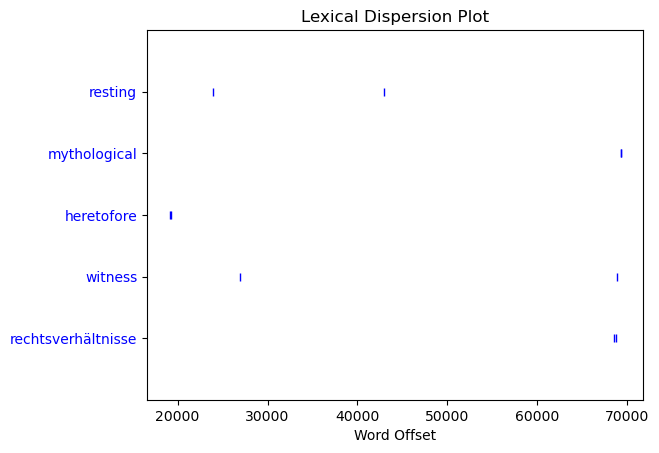

In [307]:

text.dispersion_plot(median_words)

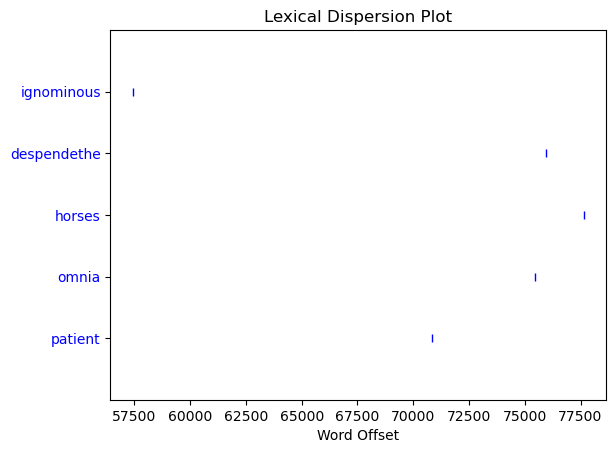

In [308]:
text.dispersion_plot(most_rare_words)